# Lab: Analyze and Preprocess

Now that you know how to perform a basic analyze and preprocess, let's put that in the practice.

Here we will use a sample from DEAP dataset, `s01.dat`.

Download the sample [here](https://drive.google.com/file/d/19XbYM6WFT9L2mD5l_66mKQzHNZnhee2t/view?usp=sharing). Use your AIT account.

While we wait for the file to download, here is the information about the dataset.

[DEAP](https://www.eecs.qmul.ac.uk/mmv/datasets/deap/)

![alt](https://www.eecs.qmul.ac.uk/mmv/datasets/deap/img/graph.png)

A Database for Emotion Analysis using Physiological Signals (DEAP) consists of 32 participants/samples. The data is an EEG (and other Physiological responses) record of someone watching a video that induce certain emotion. Thus, Independent Variable (IV) is EEG and Dependent variable (DV) is Emotion. 

Each participant watch 40 videos. Each video is 60 seconds long. The EEG sampling rate is 128 Hz. The trial has 3 seconds pre-trial/fixation. Thus, each trial is 63 seconds and 63 $\times$ 128 = 8064 time samples.

Now, about EEG recording. Electroencephalogram (EEG) is an electrical activity of the brain which captures brain activity. We know certain part of the brain is correlated to certain function of a human. Thus, we put multiple sensor on different point of the brain. The sensor/electrode placement guide/convention is 10-20 International system.

![alt](https://www.researchgate.net/publication/324361441/figure/fig1/AS:618934365597697@1524576860370/The-10-20-International-system-of-EEG-electrode-placement.png)

The number of electrode and which place is used depends on the researcher/cost/experiment also the sampling rate. Thus, we have to read their document to find out which electrode placement and sampling rate is used.

For this DEAP the electrode placement are the following.

- 1:	Fp1	
- 2:	AF3
- 3:	F3
- 4:	F7
- 5:	FC5
- 6:	FC1
- 7:	C3
- 8:	T7
- 9:	CP5
- 10:	CP1
- 11:	P3
- 12:	P7
- 13:	PO3
- 14:	O1
- 15:	Oz
- 16:	Pz
- 17:	Fp2
- 18:	AF4
- 19:	Fz
- 20:	F4
- 21:	F8
- 22:	FC6
- 23:	FC2
- 24:	Cz
- 25:	C4
- 26:	T8
- 27:	CP6
- 28:	CP2
- 29:	P4
- 30:	P8
- 31:	PO4
- 32:	O2

- 33:	hEOG (horizontal EOG, hEOG1 - hEOG2)	
- 34:	vEOG (vertical EOG, vEOG1 - vEOG2)
- 35:	zEMG (Zygomaticus Major EMG, zEMG1 - zEMG2)
- 36:	tEMG (Trapezius EMG, tEMG1 - tEMG2)
- 37:	GSR (values from Twente converted to Geneva format (Ohm))
- 38:	Respiration belt
- 39:	Plethysmograph
- 40:	Temperature

Out of 40 channels, there are 32 EEG channels.

In summary, the IV has 40 videos, 40 channels, and 8064 time samples (40, 40, 8064)

The DV (labels) has a shape (40, 4) which is 40 videos and 4 emotions (valence, arousal, dominance, liking)

You probably are done downloading by now. Let's start coding!!!!

<u>Objective</u>
1. Get your hands dirty with signal analyze and preprocessing on the real dataset.
2. Prepare data for classification using `SVM` from `sklearn`

In [5]:
import pickle
import os
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
plt.style.use('seaborn-whitegrid')

## Task 1

Easy, move the downloaded `s01.dat` to the `dataset` folder

In [6]:
assert os.path.exists('dataset/s01.dat'), "Well, you probably forget to move the s01.dat"

## Task 2

Read the `s01.dat` using the given function and confirmed the shape.

The IV is (40,40,8064)

The DV is (40,4)

In [7]:
def read_data(path:str) -> np.ndarray:
    return pickle.load(open(path, 'rb'), encoding='latin1')

In [8]:
# answer
path = 'dataset/s01.dat'
data = read_data(path)
# The s01.dat is a dictionary with 'labels' and 'data' as keys
print(type(data), data.keys())
# the values of each key are numpy array
print(type(data['data']), type(data['labels']))
# Here is the shape
print(f"{data['data'].shape=}")
print(f"{data['labels'].shape=}")

<class 'dict'> dict_keys(['labels', 'data'])
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
data['data'].shape=(40, 40, 8064)
data['labels'].shape=(40, 4)


## Task 3

Let's plot the signal and FFT of first video, first channel.

The signal plot should have x-axis as `time (second)` and the FFT plot should have x-axis as `frequency (Hz)`. Based on the sampling rate, the range of frequency to plot is 0 - 64 Hz

t.shape=(8064,) x.shape=(8064,)
(8064,) (8064,)


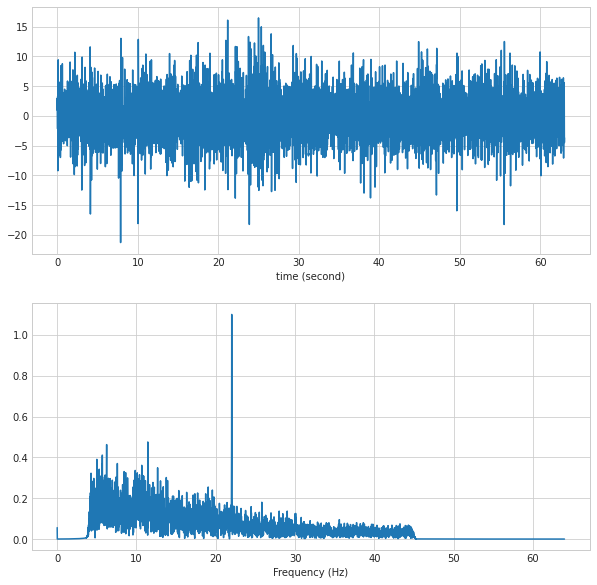

In [9]:
# Answer
fs = 128 #Hz
x = data['data'][0][0]
t = np.arange(start=0, stop=63, step= 1/fs)
print(f"{t.shape=} {x.shape=}")
fig, ax = plt.subplots(nrows = 2, figsize=(10,10))
ax[0].plot(t,x)
ax[0].set_xlabel('time (second)')

X = np.fft.fft(x, axis=-1, n=None)
freq_range = np.fft.fftfreq(x.shape[-1], d=1/fs)
print(X.shape, freq_range.shape)

ax[1].plot(freq_range[:8064//2], np.abs(X[:8064//2])/(len(x)/2) )
ax[1].set_xlabel('Frequency (Hz)')
plt.show()

## Task 4

Does the signal contain all frequencies?



No, the signal has the range of 4 - 45 Hz

You can read [here](https://www.eecs.qmul.ac.uk/mmv/datasets/deap/readme.html). 

## Task 5

Plot the STFT of the first video of the first 2 channels.

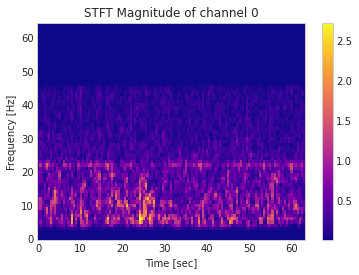

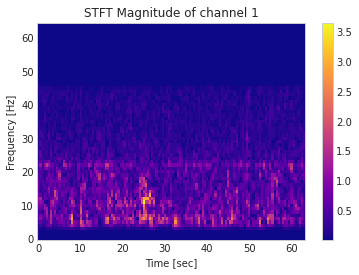

In [10]:
# Answer
for i in [0,1]:
    x = data['data'][0][i]
    f_bin,t_bin,Zxx = scipy.signal.stft(x=x, fs=fs, nperseg=fs)
    c = plt.pcolormesh(t_bin, f_bin, np.abs(Zxx),cmap='plasma')
    plt.colorbar(c)
    plt.title(f'STFT Magnitude of channel {i}')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.show()

## Task 6

Now, we want to train the SVM model and see whether the model can classify emotion based on the EEG signal.

Let's plan this ahead. 

The sklearn model accept the IV shape of `(n_samples, n_features)`. The `n_samples` is `videos`. Then, what is `n_features`?

This is where we need to do research about EEG.

But for now, I will tell you that EEG consists of 5 frequencies bands and each band has a correlation to certain state of Human emotion.

Common EEG bands are

1. Delta [0-4]
2. Theta [4-8]
3. Alpha [8-14]
4. Beta  [14-30]
5. Gamme [30-$\infty$]

The number and range are different among the papers but not way off.

Since we only have 40 trials, the data have 32 X 5 bands which is 160 features. Based on the learning theory, this won't work. But anyway, we do this as a practice.

So this task, preprocess the IV into a shape of (40, 160)

*Don't forget to ignore the first 3 seconds*

*Don't forget to only pick the EEG channels*

In [11]:
# Answer
# You can use FFT or STFT. Here I will use STFT and average down the time axis and extract each bands

fs = 128 #Hz
# STFT can perform the operation on any shape as long as the last axis is time samples
f_bin,t_bin,Zxx = scipy.signal.stft(x=data['data'][:, :32, 3 * fs: ], fs=fs, nperseg=fs)
# f_bin has a shape of 65 beause the bandwidth is 0 - 64
print(f"{f_bin.shape=} {t_bin.shape=} {Zxx.shape=}")
# We want the magnitude of Zxx
Zxx = np.abs(Zxx)
# Average down the t axis
Zxx = Zxx.mean(axis=3)
print(f"{Zxx.shape=}")

IV = []

for f_band in [(0,4), (4,8), (8,14), (14,30), (30,64)]:
    band = Zxx[:,:,f_band[0]:f_band[1]].mean(axis=2)
    IV.append(band)

IV = np.hstack(IV)

print(f"{IV.shape=}")


f_bin.shape=(65,) t_bin.shape=(121,) Zxx.shape=(40, 32, 65, 121)
Zxx.shape=(40, 32, 65)
IV.shape=(40, 160)


## Task 7

This is also easy, prepare DV. You can pick any emotion you want to train/build.

However, the data in the DV is a score range of [0-10], not a binary class. 

I will pick 'valence' and 5 as a threshold.

*The shape of 'labels' coresponse to this (valence, arousal, dominance, liking)*

In [12]:
# Answer
DV = data['labels'][:,0]
DV[DV<5] = 0
DV[DV>5] = 1

## Task 8

Now that we are ready to train SVM. Just train it.

Don't forget to split train/test set. Because we only have 40 samples, let's do test size = 0.15

In [21]:
# Answer
IV_train, IV_test, DV_train, DV_test = train_test_split(IV, DV, test_size=0.15, random_state=42)

svm = SVC(kernel='rbf')
svm.fit(IV_train, DV_train)

preds = svm.predict(IV_test)

acc = sum(DV_test == preds) / (len(DV_test))
print(acc)

0.3333333333333333
